<div align="left">
   <img src="https://usfdons.com/images/responsive/footer_usfca.png" style="width:250px;">
</div>
<div align="center"><b>MSDS630 - Advanced Machine Learning</b></div>

**Names:** Robert Sandor, Viviana M. Peña-Márquez, Xu Lian<br>
**Group:** FatPapaya (15)<br>
**Instructor:** Yannet Interian<br>
**Date:** Februrary 14th, 2019
<hr>

# EDA

In [208]:
import os
import boto3 
import json

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import s3fs
from datetime import datetime
import calendar

In [91]:
#sc = SparkContext()
#ss = SparkSession.builder.getOrCreate()

In [9]:
files = ! aws s3api list-objects --bucket msds630-kaggle-competition
files = [f.split()[1][1:-2] for f in files.get_list() if ".csv" in f]
files # files in the bucket

['attributes.csv', 'events.csv', 'messages.csv', 'sessions.csv']

#### Load Data

*Messages*

In [10]:
types = {"app_id": np.uint64,
         "message_id": np.uint64,
         "action_type": "category",
         "delivery_type": "category",
         "delivery_time_mode": "category",
         "goal_kind": "category"}

In [11]:
df_messages = pd.read_csv('s3://msds630-kaggle-competition/messages.csv', usecols=types.keys(), dtype=types)

In [12]:
df_messages.head()

,app_id,message_id,action_type,delivery_type,delivery_time_mode,goal_kind
0,6196435404455936,5420304779837440,__Push Notification,4,3,NaN
1,6196435404455936,5059935179767808,__Push Notification,0,3,NaN
2,6196435404455936,6563799154425856,__Webhook,4,3,NaN
3,6196435404455936,4680497250304000,__Push Notification,0,3,NaN
4,4724682771660800,6286714069450752,Center Popup,0,3,3


*Sessions*

In [186]:
types = {"app_id": np.float64,
         "session_id": np.float64,
         "start_timestamp": np.float64,
         "timezone": "str",
         "timezone_offset": np.float32,
         "previous_sessions_duration": np.float64,
         "user_created_timestamp": np.float64,
         "is_user_first_session": np.bool,
         "is_session": np.bool,
         "is_developer": np.bool,
         "is_wau": np.bool,
         "is_mau": np.bool,
         "country": "category",
         "region": "str",
         "city": "str",
         "latitude": np.float32,
         "longitude": np.float32,
         "locale": "category",
         "os_name": "category",
         "session_index": np.float16,
         "device_id": "str",
         "user_id_hash": "str"}

In [187]:
df_sessions = pd.read_csv('s3://msds630-kaggle-competition/sessions.csv', nrows = 25000, usecols=types.keys(), dtype=types)

In [188]:
df_sessions.head()

,app_id,session_id,start_timestamp,timezone,timezone_offset,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,...,country,region,city,latitude,longitude,locale,os_name,session_index,device_id,user_id_hash
0,4.724683e+15,5.558845e+18,1.542215e+12,Asia/Manila,28800000.0,25837591.0,1.538874e+12,False,True,False,...,PH,00,makati,14.554729,121.024445,en_GB,Android OS,30.0,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,4.724683e+15,2.201962e+18,1.543713e+12,Asia/Manila,28800000.0,35050130.0,1.538874e+12,False,True,False,...,PH,00,quezon city,14.676041,121.043701,en_GB,Android OS,47.0,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,4.724683e+15,1.878111e+16,1.539216e+12,Asia/Manila,28800000.0,11343848.0,1.538874e+12,False,True,False,...,PH,00,makati,14.554729,121.024445,en_GB,Android OS,10.0,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4.724683e+15,1.477540e+18,1.540121e+12,Asia/Manila,28800000.0,13499724.0,1.538874e+12,False,True,False,...,PH,11,davao city,7.190708,125.455338,en_GB,Android OS,13.0,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,4.724683e+15,8.184875e+18,1.542672e+12,Asia/Manila,28800000.0,32788010.0,1.538874e+12,False,True,False,...,PH,00,makati,14.554729,121.024445,en_GB,Android OS,41.0,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...


*Events*

In [183]:
types = {"app_id": np.float64,
         "session_id": np.float64,
         "event": "str",
         "event_timestamp": np.float64,
         "event_value": np.float16,
         "user_id_hash": "str"}

In [184]:
df_events = pd.read_csv('s3://msds630-kaggle-competition/events.csv', nrows = 25000, usecols=types.keys(), dtype=types)

In [185]:
df_events.head()

,app_id,session_id,event,event_timestamp,event_value,user_id_hash
0,4.724683e+15,5.558845e+18,45,1.542215e+12,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,4.724683e+15,5.558845e+18,45,1.542215e+12,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,4.724683e+15,7.689508e+18,.m5100869650219008,1.541124e+12,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4.724683e+15,2.201962e+18,4,1.543713e+12,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,4.724683e+15,2.201962e+18,6,1.543713e+12,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...


*Attributes*

In [19]:
types = {"app_id": np.float64,
         "session_id": np.float64,
         "attribute": np.float16,
         "attribute_value": "str",
         "user_id_hash": "str"}

In [20]:
df_attributes = pd.read_csv('s3://msds630-kaggle-competition/attributes.csv', error_bad_lines=False, nrows=25000, usecols=types.keys(), dtype=types)

In [21]:
df_attributes.head()

,app_id,session_id,attribute,attribute_value,user_id_hash
0,4.724683e+15,2.201962e+18,0.0,1,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,4.724683e+15,2.201962e+18,1.0,1,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,4.724683e+15,2.201962e+18,3.0,0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4.724683e+15,2.201962e+18,4.0,0.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,4.724683e+15,2.201962e+18,5.0,romance_the_royal_romance_02:11,9943447915df3a45fd6720a026af905b6da6b56a37701b...


#### 🎨 Visualizations

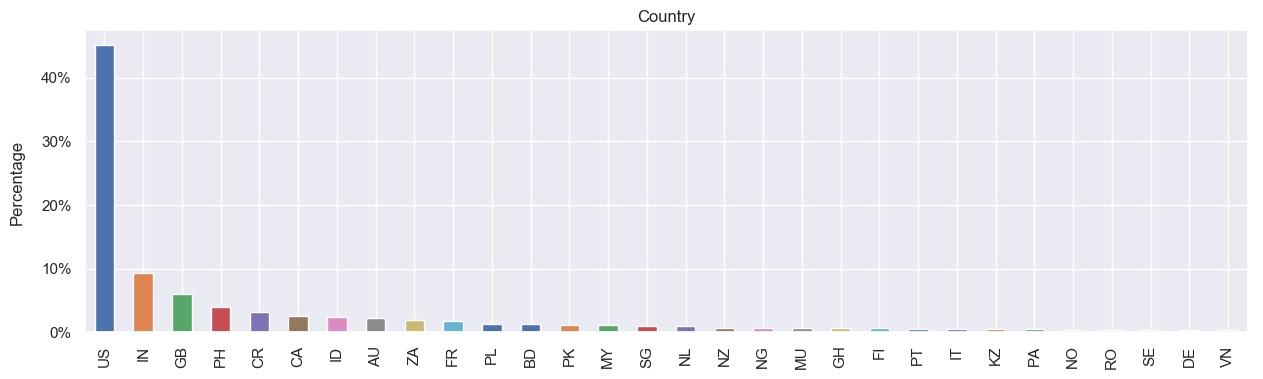

In [61]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_sessions.country.value_counts(normalize=True)[0:30].plot(kind='bar', title="Country")
vals = t.get_yticks()
t.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#fig.suptitle('', fontsize=12)
fig.text(0.08,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

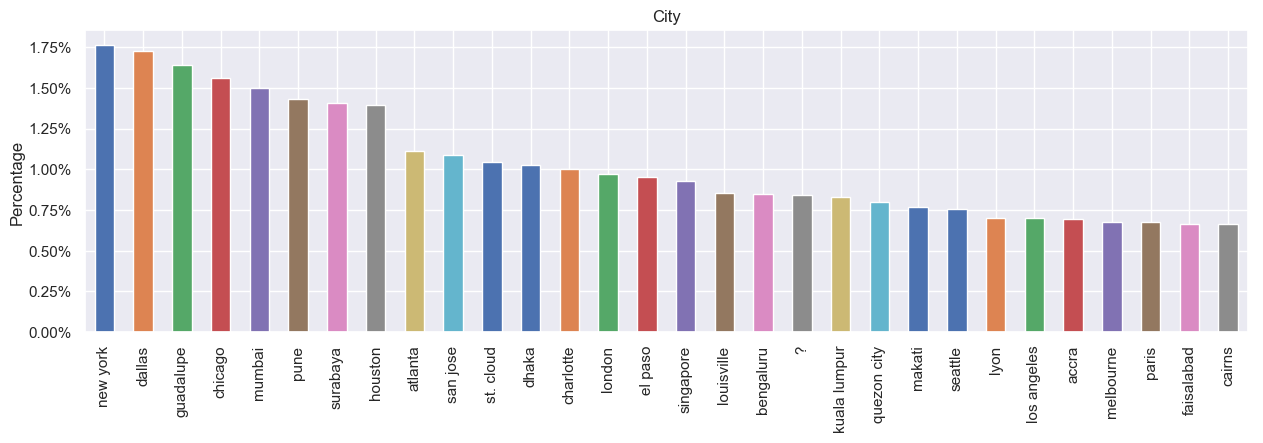

In [90]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_sessions.city.value_counts(normalize=True)[0:30].plot(kind='bar', title="City")
vals = t.get_yticks()
t.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

#fig.suptitle('', fontsize=12)
fig.text(0.08,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

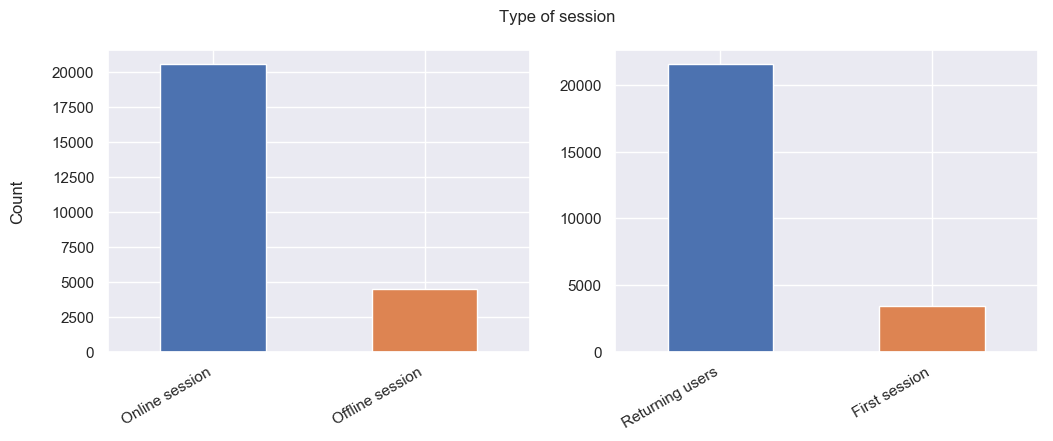

In [63]:
fig = plt.figure(figsize=(12,4), dpi=100)

t = fig.add_subplot(1,2,1)
df_sessions.is_session.value_counts().plot(kind='bar')
plt.xticks([0,1], ["Online session", "Offline session"], rotation=30, ha="right")

t = fig.add_subplot(1,2,2)
df_sessions.is_user_first_session.value_counts().plot(kind='bar')
plt.xticks([0,1], ["Returning users", "First session"], rotation=30, ha="right")

fig.suptitle('Type of session', fontsize=12)
fig.text(0.05,0.5, "Count", ha="center", va="center", rotation=90, fontsize=12);

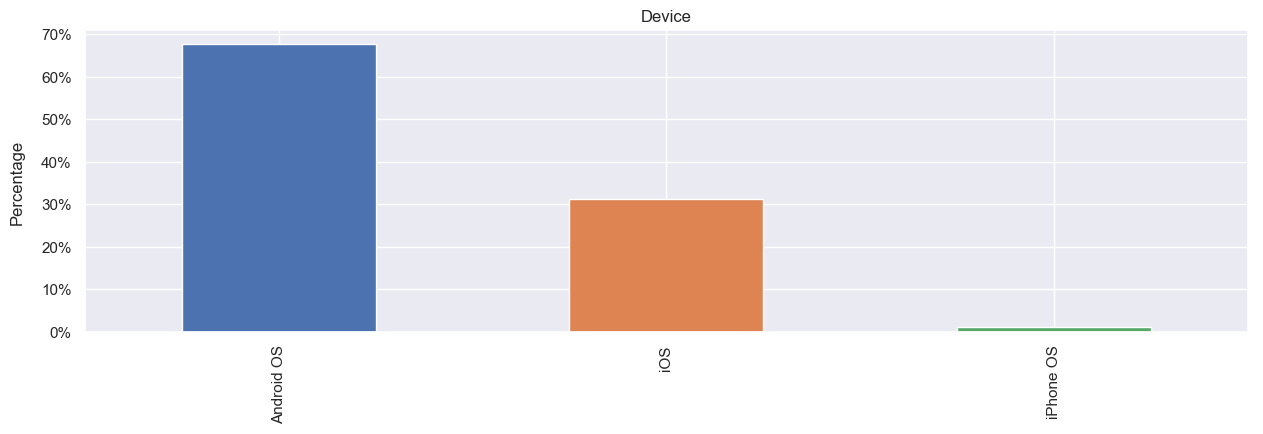

In [65]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_sessions.os_name.value_counts(normalize=True)[0:30].plot(kind='bar', title="Device")
vals = t.get_yticks()
t.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#fig.suptitle('', fontsize=12)
fig.text(0.08,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

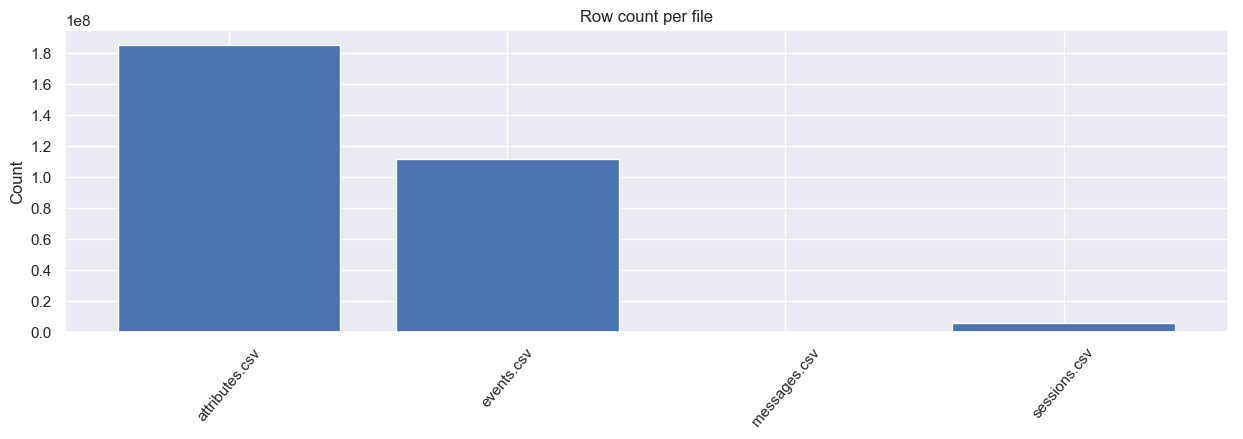

In [88]:
fig = plt.figure(figsize=(15,4), dpi=100)

row_count = [185_590_092, 111_946_597, 2_896, 6_239_836]
#total = sum(row_count)
#row_count = [r/total for r in row_count]

D = {}
for (file,row) in zip(files,row_count):
    D[file]=row
    
plt.bar(range(len(D)), list(D.values()), align='center', )
plt.xticks(range(len(D)), list(D.keys()), rotation=50)
plt.yticks(np.arange(0, 200_000_000, step=20_000_000))
plt.ylabel("Count")
plt.title("Row count per file")

plt.show()

In [189]:
temp = df_sessions.groupby("country").mean().previous_sessions_duration.sort_values(ascending=False)
temp = pd.DataFrame(temp)
temp['duration'] = temp['previous_sessions_duration'].map(lambda x: str(timedelta(milliseconds=x)))

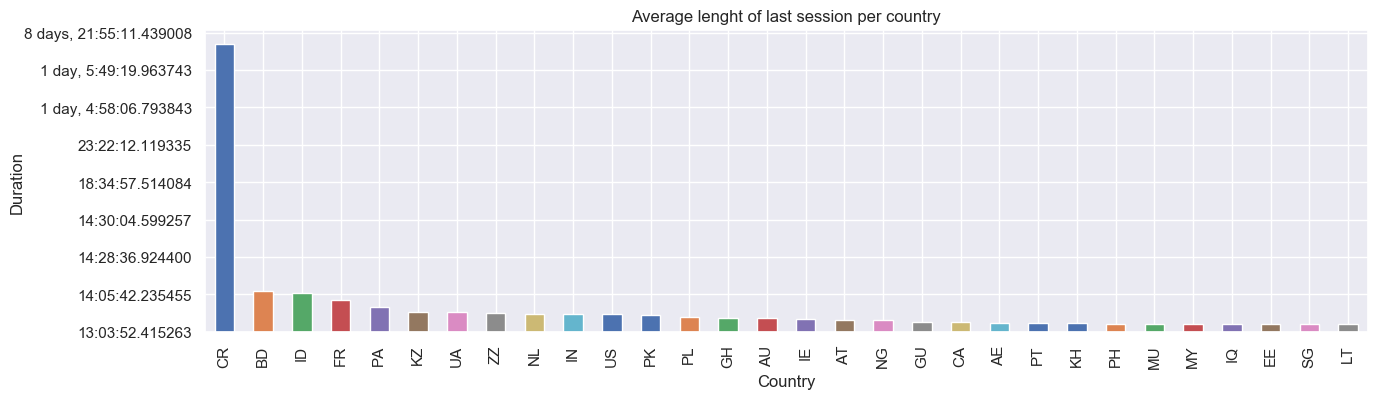

In [190]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)

temp['previous_sessions_duration'].sort_values(ascending=False)[0:30]\
.plot(kind='bar', title="Average lenght of last session per country")
vals = t.get_yticks()
t.set_yticklabels(temp['duration'][:len(vals)-1][::-1])
plt.xlabel("Country")

fig.text(0,0.5, "Duration", ha="center", va="center", rotation=90, fontsize=12);

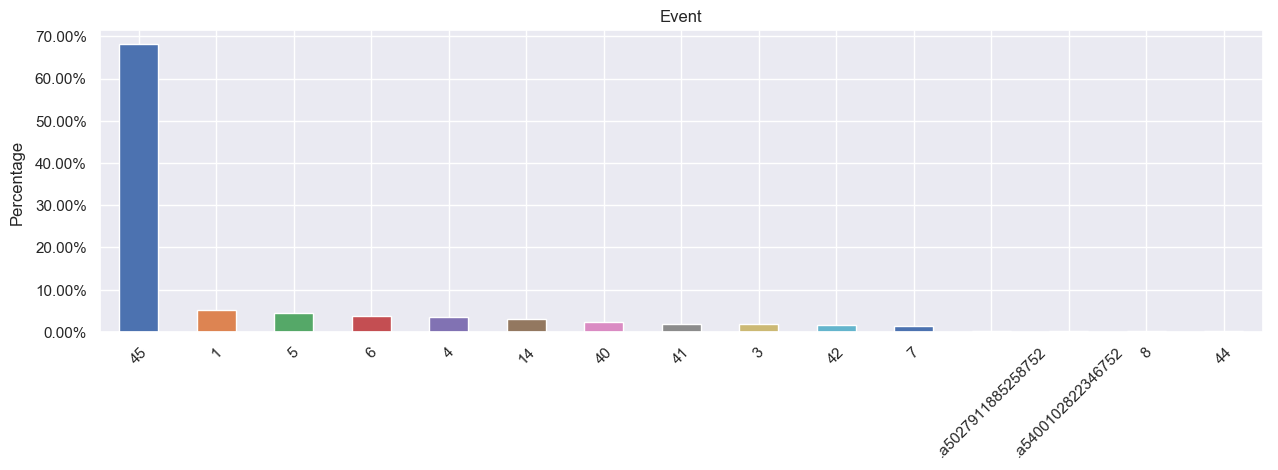

In [191]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_events.event.value_counts(normalize=True)[0:15].plot(kind='bar', title="Event")
vals = t.get_yticks()
t.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.xticks(rotation=45)

#fig.suptitle('', fontsize=12)
fig.text(0.07,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

In [212]:
df_events['datetime'] = pd.DataFrame(pd.to_datetime(df_events.event_timestamp, unit='ms'))
df_events['dow'] = df_events["datetime"].map(lambda x: calendar.day_name[x.weekday()])

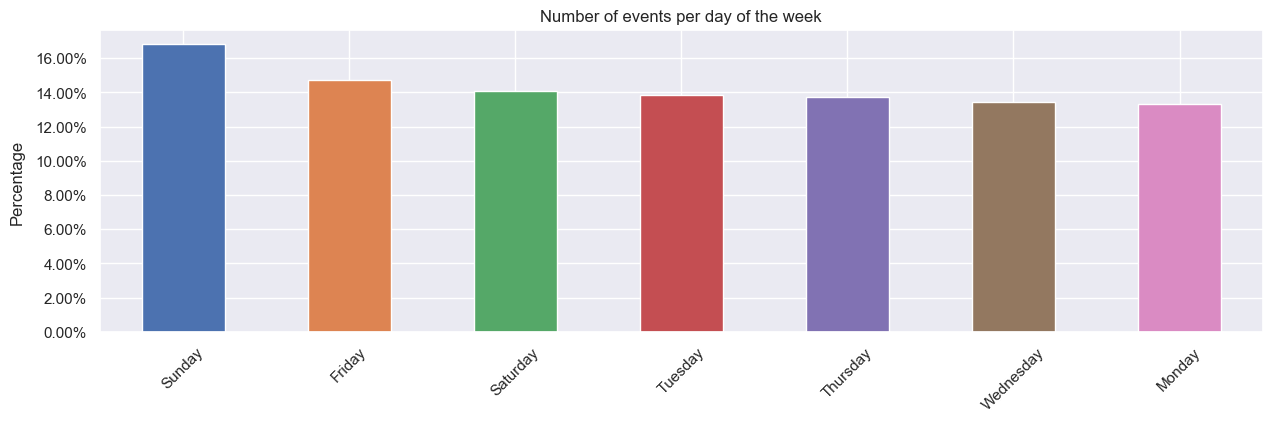

In [222]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_events.dow.value_counts(normalize=True).plot(kind='bar', title="Number of events per day of the week")
vals = t.get_yticks()
t.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.xticks(rotation=45)

#fig.suptitle('', fontsize=12)
fig.text(0.07,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

In [223]:
df_events.datetime.min()

Timestamp('2018-10-01 21:06:46.476000')

In [224]:
df_events.datetime.max()

Timestamp('2018-12-14 19:05:21.438000')

In [269]:
df_events.groupby(['event', 'dow']).count()

app_id  session_id  event_timestamp  \
event              dow                                              
.a5008055943430144 Saturday        2           2                2   
                   Sunday          1           1                1   
                   Thursday        3           3                3   
.a5027911885258752 Friday         12          12               12   
                   Monday         10          10               10   
                   Saturday       11          11               11   
                   Sunday         13          13               13   
                   Thursday       10          10               10   
                   Tuesday         9           9                9   
                   Wednesday       5           5                5   
.a5061295285075968 Monday          1           1                1   
                   Saturday        5           5                5   
                   Thursday        1           1                1   
                   Tuesday         3           3                3   
.a5400102822346752 Friday         12          12               12   
                   Monday         10          10               10   
                   Saturday       11          11               11   
                   Sunday         13          13               13   
                   Thursday       10          10               10   
                   Tuesday         9           9                9   
                   Wednesday       5           5                5   
.a5516611293544448 Friday          8           8                8   
                   Monday          5           5                5   
                   Saturday        7           7                7   
                   Sunday         12          12               12   
                   Thursday        5           5                5   
                   Tuesday         7           7                7   
                   Wednesday       4           4                4   
.a5523274289512448 Friday          1           1                1   
                   Tuesday         1           1                1   
...                              ...         ...              ...   
63                 Friday         12          12               12   
                   Saturday        8           8                8   
                   Sunday          9           9                9   
                   Thursday        5           5                5   
                   Tuesday         8           8                8   
                   Wednesday       9           9                9   
64                 Saturday        1           1                1   
                   Sunday          2           2                2   
                   Tuesday         1           1                1   
                   Wednesday       2           2                2   
7                  Friday         41          41               41   
                   Monday         45          45               45   
                   Saturday       51          51               51   
                   Sunday         64          64               64   
                   Thursday       45          45               45   
                   Tuesday        41          41               41   
                   Wednesday      40          40               40   
8                  Friday          9           9                9   
                   Monday         10          10               10   
                   Saturday        5           5                5   
                   Sunday         13          13               13   
                   Thursday        9           9                9   
                   Tuesday         9           9                9   
                   Wednesday      10          10               10   
9                  Friday          1           1                1   
                   Monday   

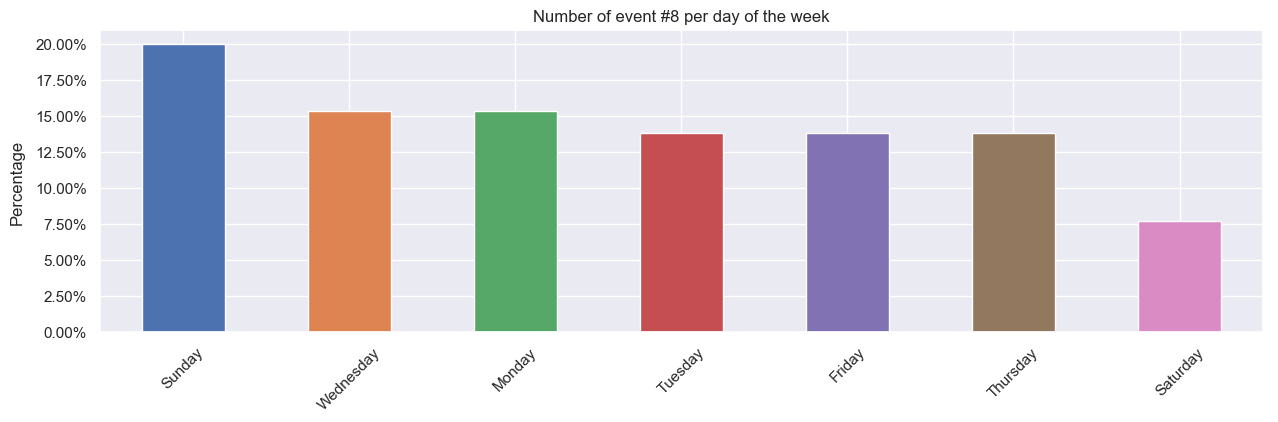

In [256]:
fig = plt.figure(figsize=(15,4), dpi=100)

t = fig.add_subplot(1,1,1)
df_events[df_events.event == '8'].dow.value_counts(normalize=True).plot(kind='bar', title="Number of event #8 per day of the week")
vals = t.get_yticks()
t.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.xticks(rotation=45)

#fig.suptitle('', fontsize=12)
fig.text(0.07,0.5, "Percentage", ha="center", va="center", rotation=90, fontsize=12);

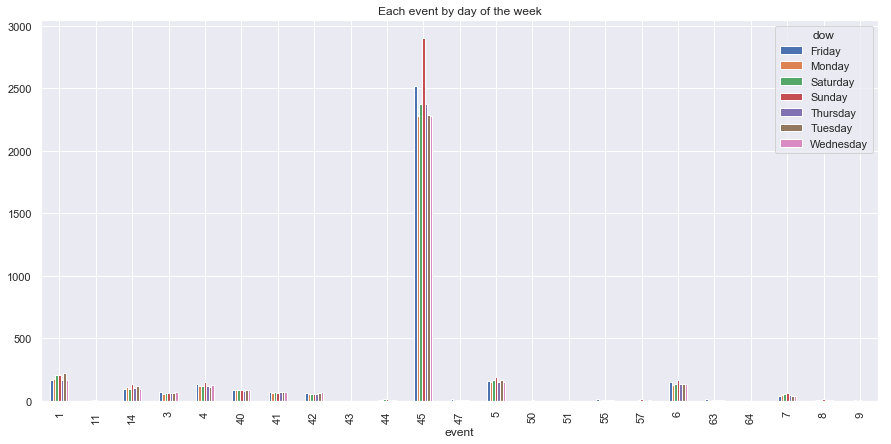

In [274]:
fig, ax = plt.subplots(figsize=(15,7))
df_events.groupby(['event', 'dow']).count()['app_id'].unstack()[20:].plot(kind='bar', title="Each event by day of the week",ax=ax);